In [1]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


In [2]:
### Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from scipy.stats import ttest_ind, normaltest

In [3]:
# Load the dataset from CSV
data = pd.read_csv('/content/AAPL, 1D 01012007-12072023.csv')

data.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [4]:
print(data.info())

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB
None
volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64


In [5]:
data['time_plot'] = pd.to_datetime(data['time'], unit='s')

data.head()

,volume,vwap,open,close,high,low,time,transactions,time_plot
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737,2007-01-03 05:00:00
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333,2007-01-04 05:00:00
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050,2007-01-05 05:00:00
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547,2007-01-08 05:00:00
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578,2007-01-09 05:00:00


All the data is in a correct format for analysing.  The dataset has no null values. Created a time_plot column for better visualisation

In [6]:
### Examine the time series properties

data.describe()

,volume,vwap,open,close,high,low,time,transactions,time_plot
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03,4159
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05,2015-04-06 10:13:19.807646208
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04,2007-01-03 05:00:00
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05,2011-02-16 17:00:00
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05,2015-04-08 04:00:00
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05,2019-05-23 16:00:00
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06,2023-07-12 04:00:00
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05,NaN


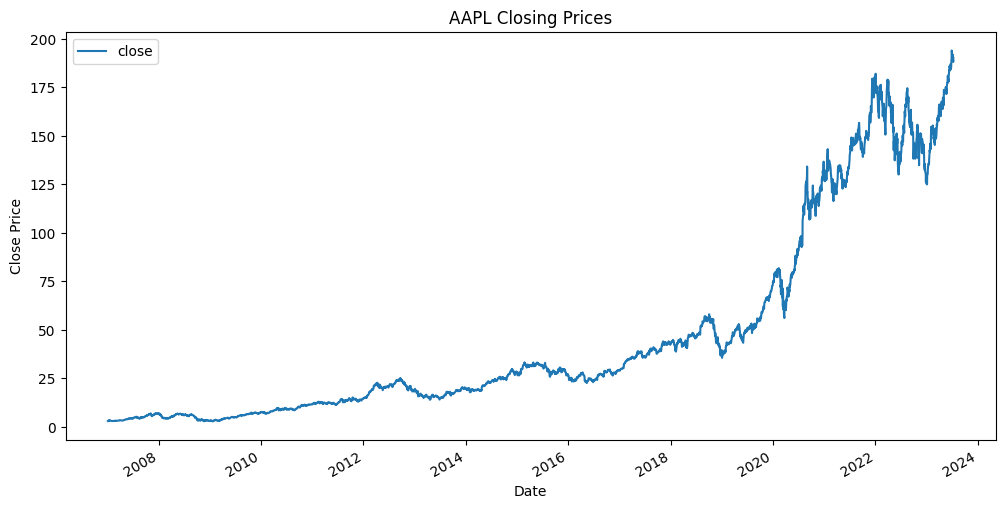

In [7]:
# Checking the frequency and trends
data.plot(x='time_plot', y='close', title='AAPL Closing Prices', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [8]:
data1 = data.copy()

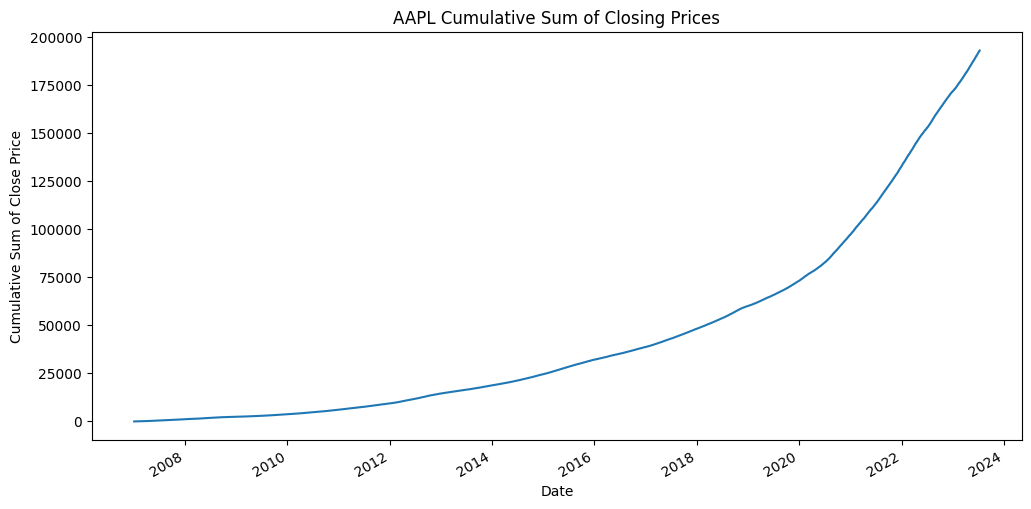

In [9]:
data1['cumulative_sum'] = data1['close'].cumsum()

# Set 'time_plot' as the index
data1.set_index('time_plot', inplace=True)

# Plot cumulative sum of closing prices
data1['cumulative_sum'].plot(title='AAPL Cumulative Sum of Closing Prices', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Cumulative Sum of Close Price')
plt.show()

Here we can see, that close price is showing a stable groeth trend. We can see it even better through cumulative sum plot.

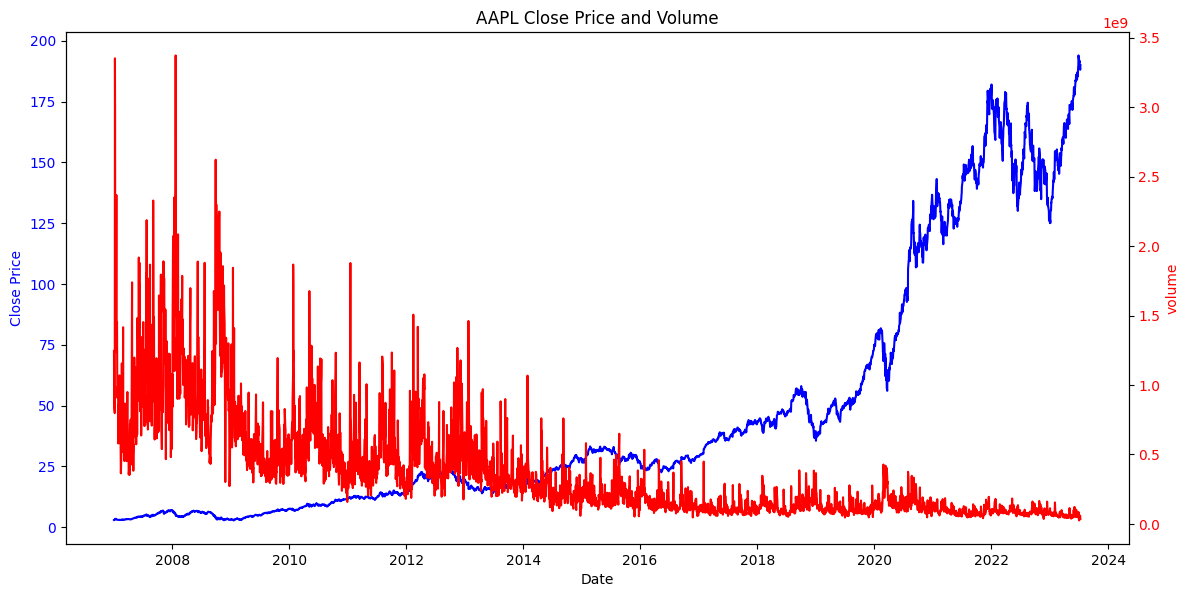

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data1.index, data1['close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(data1.index, data1['volume'], color='red', label='Volume')
ax2.set_ylabel('volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('AAPL Close Price and Volume')
plt.show()

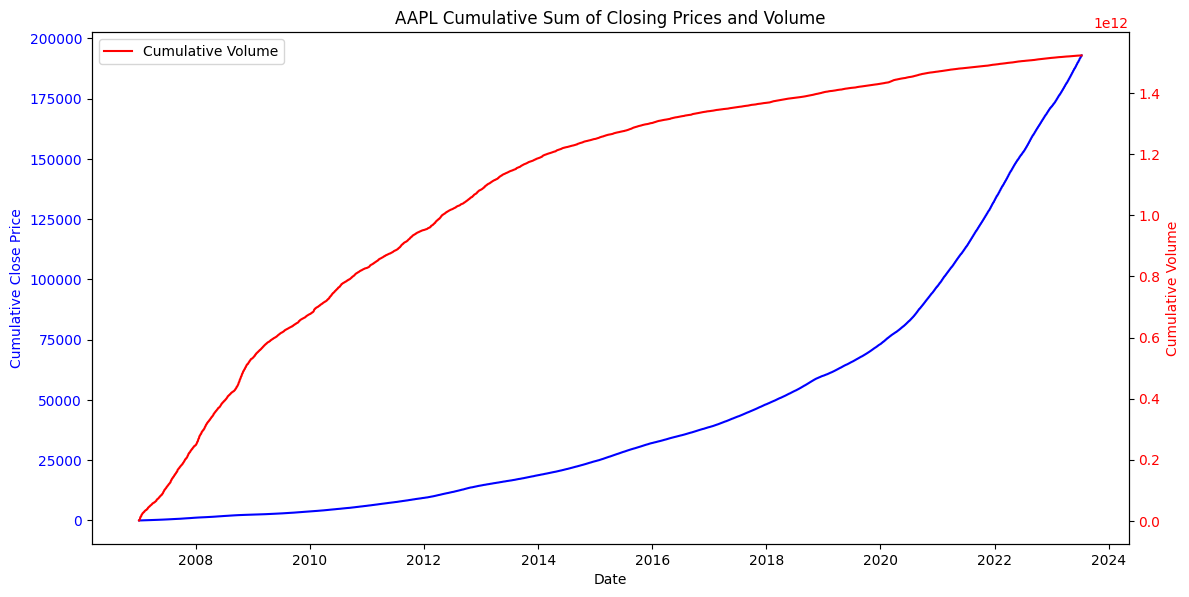

In [11]:
data1['cumulative_volume'] = data1['volume'].cumsum()

# Plot cumulative sum of closing prices and trading volume
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data1.index, data1['cumulative_sum'], color='blue', label='Cumulative Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(data1.index, data1['cumulative_volume'], color='red', label='Cumulative Volume')
ax2.set_ylabel('Cumulative Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('AAPL Cumulative Sum of Closing Prices and Volume')
plt.legend(loc='upper left')
plt.show()

We can see, that since company began to grow, the ammount of new stocks issued is quite small, and the price is getting bigger.  

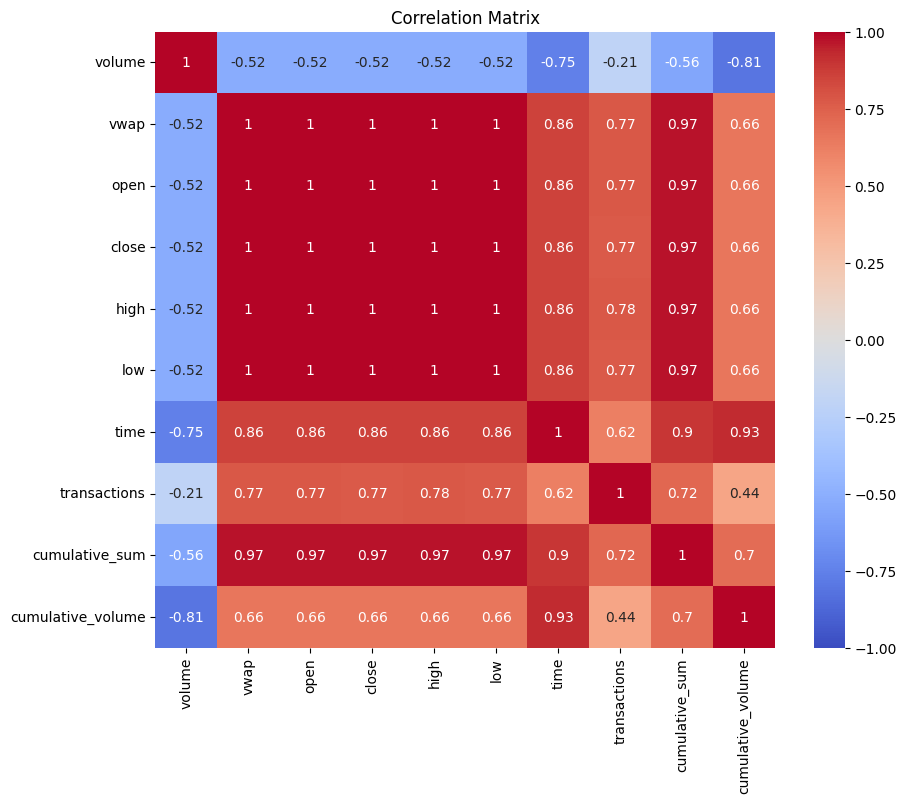

In [12]:
# Compute the correlation matrix
corr_matrix = data1.corr()

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The matrix shows, that all the stock prices are correlated with time. But it is quite obvious, so I wouldn't put it into real analysis.

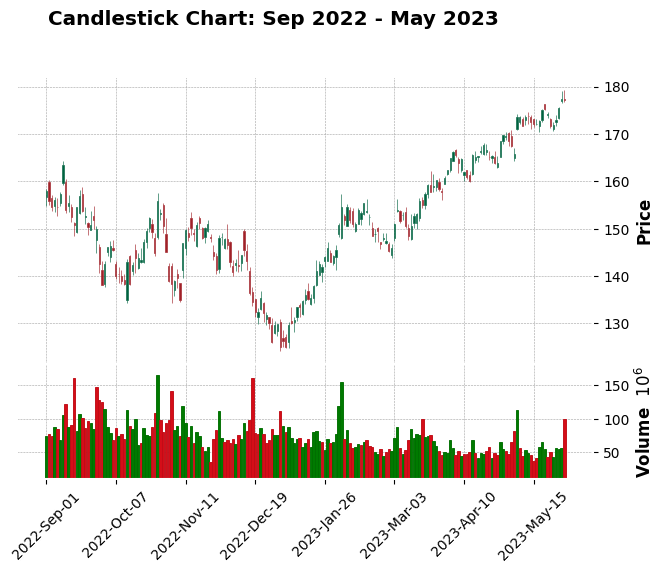

In [13]:
###Create a candlestick chart
# Filter data for September 2022 to May 2023
data2 = data.copy()
data2['time_plot'] = pd.to_datetime(data2['time'], unit='s')
data2.set_index('time_plot', inplace=True)
start_date = '2022-09-01'
end_date = '2023-05-31'
filtered_data = data2.loc[start_date:end_date]

# Plot candlestick chart for the filtered data
mpf.plot(filtered_data, type='candle', style='charles', title='Candlestick Chart: Sep 2022 - May 2023', volume=True)

# Show the plot
mpf.show()

In the candlstick bar I focused on the last 9 months stock price movements. We saw quite a fall in prices in December -January prices were lover/ It's unusual for apple stocks, but that year there were no big announcments from October till April. The main reason was Corona in China and special pandemic policy, that influenced on the volume of items issued.

             volume         vwap         open        close         high  \
count  4.159000e+03  4159.000000  4159.000000  4159.000000  4159.000000   
mean   3.662925e+08    46.391382    46.362788    46.396058    46.881127   
min    2.422234e+07     2.841000     2.835400     2.792900     2.928600   
25%    1.067497e+08    11.936200    11.955700    11.947150    12.028400   
50%    2.136463e+08    25.885200    25.775000    25.825000    26.262800   
75%    4.965321e+08    52.154150    52.263750    52.231250    52.626250   
max    3.373042e+09   193.102000   193.780000   193.970000   194.480000   
std    3.724793e+08    50.277557    50.235593    50.293482    50.843874   

               low          time  transactions                      time_plot  
count  4159.000000  4.159000e+03  4.159000e+03                           4159  
mean     45.865790  1.428315e+09  2.709318e+05  2015-04-06 10:13:19.807646208  
min       2.792900  1.167800e+09  3.048700e+04            2007-01-03 05:00:00  
25% 

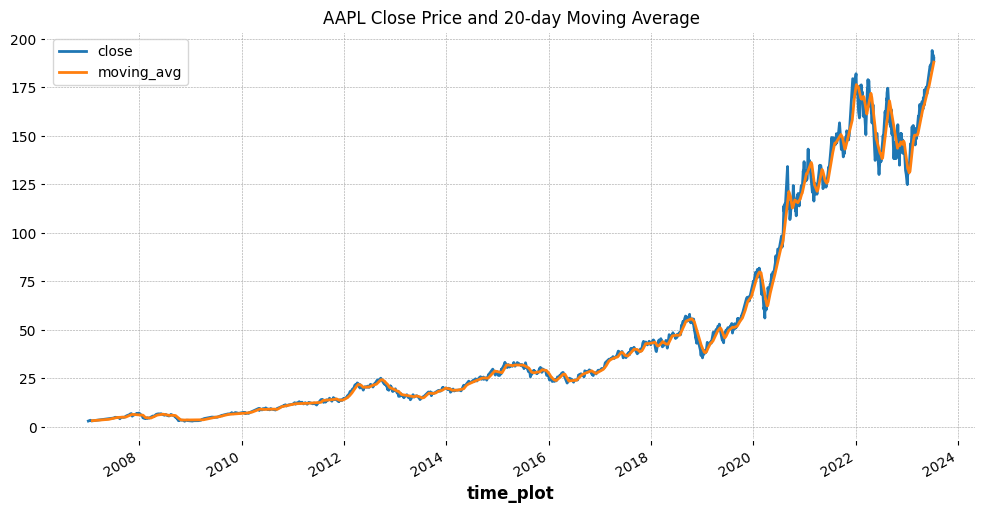

In [14]:
### Statistic analysis

# Computing summary statistics
summary_stats = data.describe()
print(summary_stats)

# Moving average
data1['moving_avg'] = data1['close'].rolling(window=20).mean()
data1[['close', 'moving_avg']].plot(figsize=(12,6), title='AAPL Close Price and 20-day Moving Average')
plt.show()


When the blue line (closing prices) is consistently above the orange line (moving average), it suggests that AAPL stock prices have been generally increasing over the recent past.
When the blue line is consistently below the orange line, it indicates that AAPL stock prices have been decreasing.

In [15]:
### Hypothesys testing

#T-test
data1['year'] = data1.index.year

# Compare average closing prices between two years
year_2019 = data1[data1['year'] == 2019]['close']
year_2022 = data1[data1['year'] == 2022]['close']

t_stat, p_value = ttest_ind(year_2019, year_2022, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -104.08049479938175, P-value: 1.0177136614737475e-308


The null hypothesis was "Stock prices at the end of 2019 (before COVID) were bigger, than during Corona", was rejected. We can see, negative T-statistic shows, that in 2022 stocks were cignificantly higher, that in 2019. And a strong evidence - significantly small P-value, that is clouse to 0.  

In [16]:
# Examine daily returns’ distribution and test for normality
data1['daily_return'] = data1['close'].pct_change().dropna()

# Normality test
k2, p = normaltest(data1['daily_return'].dropna())
print(f"Normality test: Statistics={k2}, p-value={p}")

Normality test: Statistics=535.5862106742969, p-value=4.999563172686955e-117


Cause p-value is really small we are rejecting a null hypotisis that data is normally distributed.

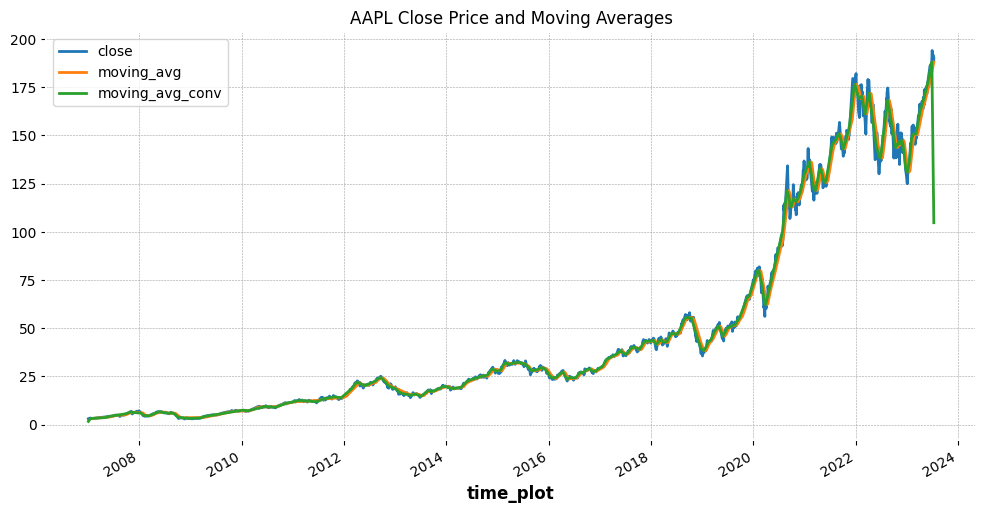

In [17]:
### Advanced Statistical Techniques (Bonus)
from scipy.signal import convolve

# Moving average using convolve
weights = np.ones(20) / 20
data1['moving_avg_conv'] = convolve(data1['close'], weights, mode='same')

data1[['close', 'moving_avg', 'moving_avg_conv']].plot(figsize=(12,6), title='AAPL Close Price and Moving Averages')
plt.show()

Smoothness: The convolution-based moving average (moving_avg_conv) might appear smoother compared to the simple moving average (moving_avg), especially around the edges of the plot. This is because convolution applies a weighted average evenly across all data points, whereas rolling average gives more weight to the central points in each window.

In [18]:
# Correlation between moving averages and volume
# Align the data by dropping rows with missing values in either column
valid_data = data1[['moving_avg', 'volume']].dropna()

corr = np.corrcoef(valid_data['moving_avg'], valid_data['volume'])
print(f"Correlation coefficient: {corr[0, 1]}")

Correlation coefficient: -0.5193323296629891


The index is showing moderate negative linear correlations between stock price and volume.
Changes in one variable are associated with corresponding changes in the opposite direction in the other variable, though the relationship is not strong enough to predict one variable's value precisely based on the other.

### Reflexion
The most time-tacking part was to experiment to create a readable candlechart to find the best way of representation and insights, that it could bring.